# The Data Science Challenge

Due to the lack of time (only having the weekdays to do this while working), this version is a short compilation of the main phases that the process should have. More information could have been obtained (for example, ploting the data and the results so a better knowledge of the dataset could have been obtained). But, at least, the questions proposed have been answered.

Data can be found at: [https://export.airconomy.com/candidates](https://export.airconomy.com/candidates)

# Exercise 1: Count the number of lines in Python for each file

First of all we should have a look at the files. Both have a bz2 extension. For that, python has its own library. You can check it [here](https://docs.python.org/3/library/bz2.html). Let's see what we have there:

In [1]:
! ls -l

total 1013880
-rw-rw-rw- 1 joeldela joeldela     12325 Nov 26 23:17 Data_Science_Challenge.ipynb
-rw-rw-rw- 1 joeldela joeldela      2334 Nov 24 17:58 README.md
-rwxrwxrwx 1 joeldela joeldela 554970628 Nov 26 23:14 bookings.csv.bz2
-rwxrwxrwx 1 joeldela joeldela 483188920 Nov 26 23:14 searches.csv.bz2


We can check that we do NOT have permissions for these files, so we must give us these permissions:

In [2]:
! chmod 777 bookings.csv.bz2 searches.csv.bz2

After that, we can proceed to open the files and read them. We will start with the bookings.csv file:

In [3]:
import bz2

In [4]:
bookings=bz2.BZ2File('./bookings.csv.bz2','r')
lines=0
for line in bookings:
    lines+=1
bookings.close()

print('EL archivo tiene '+str(lines)+' líneas.')

EL archivo tiene 10000011 líneas.


In [5]:
import bz2

searches=bz2.BZ2File('./searches.csv.bz2','r')
lines2=0
for line in searches:
    lines2+=1
searches.close()

print('EL archivo tiene '+str(lines2)+' líneas.')

EL archivo tiene 20390199 líneas.


Finally, we can check if this number of lines is correct with a shell command:

In [6]:
! bzcat bookings.csv.bz2 | wc -l

10000011


In [7]:
!  bzcat searches.csv.bz2 | wc -l

20390198


# Exercise 2: Top 10 arrival airports in the world in 2013 (using the bookings file)

Arrival airport is the column arr_port. It is the IATA code for the airport

To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

Print the top 10 arrival airports in the standard output, including the number of passengers.

__Bonus point__: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

__Bonus point__: Solve this problem using pandas (instead of any other approach)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1) Reading data
First of all we must have the csv file.

In [41]:
! bzcat bookings.csv.bz2 | head -n 1

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


As we can see, the csv file uses '^' as separators. So, based on that, we will read our file separated in chunks as the file itself has over 10 M lines. First, we will develope a small model with a few rows, and then we will iterate over the whole dataset.

In [42]:
bookings=pd.read_csv('bookings.csv.bz2',index_col=0,sep='^',chunksize=5000)

Now that we have an iterator we should call the first set of the Dataframe

In [43]:
bookings=next(bookings)

In [44]:
bookings.head()

,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
act_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [45]:
pd.to_datetime(bookings.index)

DatetimeIndex(['2013-03-05', '2013-03-26', '2013-03-26', '2013-03-26',
               '2013-03-26', '2013-03-20', '2013-03-20', '2013-03-25',
               '2013-03-25', '2013-03-25',
               ...
               '2013-03-14', '2013-03-14', '2013-03-27', '2013-03-27',
               '2013-03-27', '2013-03-27', '2013-03-27', '2013-03-08',
               '2013-03-08', '2013-03-12'],
              dtype='datetime64[ns]', name='act_date           ', length=5000, freq=None)

As we can see, only a few columns have been shown here, so we need to change de setup:

In [46]:
pd.set_option('display.max_columns', None)

We can check it again:

In [47]:
bookings.head()

,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
act_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


Now we can start working with the dataset.

### 2) Handling missing data

First of all we should have a look at the data itself

In [48]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2013-03-05 00:00:00 to 2013-03-12 00:00:00
Data columns (total 37 columns):
source                 5000 non-null object
pos_ctry               5000 non-null object
pos_iata               5000 non-null object
pos_oid                5000 non-null object
rloc                   5000 non-null object
cre_date               5000 non-null object
duration               5000 non-null int64
distance               5000 non-null int64
dep_port               5000 non-null object
dep_city               5000 non-null object
dep_ctry               5000 non-null object
arr_port               5000 non-null object
arr_city               5000 non-null object
arr_ctry               5000 non-null object
lst_port               5000 non-null object
lst_city               5000 non-null object
lst_ctry               5000 non-null object
brd_port               5000 non-null object
brd_city               5000 non-null object
brd_ctry               5000 non

Apparently, there are not null objects, but it may be possible that in other chunks we'll have some missing values. In that case, what we should do is:

In [49]:
bookings[['pax','arr_port']].dropna(inplace=True)          #We must drop NaN values so we can take rid of that columns

/home/joeldela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 3) Preparing and analysing data

As we want to get the top 10 airports in 2013 we should group them by this year.

In [50]:
top_10_chunk=bookings[bookings['year']==2013].groupby('arr_port')[['arr_port','pax']].sum().sort_values(by='pax',ascending=False)

In [51]:
top_10_chunk.head()

,pax
arr_port,
DCA,60
LAX,54
DEN,53
SFO,53
ORD,52


### 4) Applying everything to the whole set

Now we will write everything in one code, selecting only the columns that we want to use in order to use less memory usage:

In [77]:
bookings_it=pd.read_csv('bookings.csv.bz2',usecols=['pax','arr_port','year','off_time           '],sep='^',chunksize=10000)

bookings=pd.concat(bookings_it,ignore_index=True)
bookings.dropna(inplace=True)
bookings.drop_duplicates(inplace=True)
bookings.columns=bookings.columns.str.strip()
top_10=bookings.drop(['off_time','year'],axis=1)
    
top_10=df.groupby('arr_port').sum().sort_values(by='pax',ascending=False)
top_10.head(10)

,pax
arr_port,
LHR,14923
MCO,12017
LAX,11786
LAS,11480
JFK,11153
CDG,10869
BKK,9892
MIA,9757
SFO,9710


### 5) Using GeoBases to get the city name of the airport

First of all we must install GeoBases:

In [35]:
! pip install GeoBases3K

     |████████████████████████████████| 11.1MB 705kB/s eta 0:00:01
     |████████████████████████████████| 51kB 905kB/s eta 0:00:01
  Created wheel for GeoBases3K: filename=GeoBases3K-5.0.16-cp37-none-any.whl size=8680220 sha256=9904135fbe5751f9c753bb6a234ccf797017eb39bf45fb36a40bd00ba594e2b7
  Stored in directory: /home/joeldela/.cache/pip/wheels/be/b2/69/49d396c76ca335fc9767171d4e8b3f591aee4b25fec4a2e228
  Created wheel for python-geohash: filename=python_geohash-0.8.5-cp37-cp37m-linux_x86_64.whl size=50490 sha256=af376c1de791d0d0425240fe5265f26fda28a66e510359ab9dbe5ac4ac03a060
  Stored in directory: /home/joeldela/.cache/pip/wheels/b5/64/5a/6a286481fc7c2a698d2f297d4c90af19946be430b23eba9a33
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp37-cp37m-linux_x86_64.whl size=167759 sha256=000bf09b32ad8e667b2282020e40df548bfbd4f10c9614a106140bea8ac7ed53
  Stored in directory: /home/joeldela/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf

Then we proceed to initialize GeoBases:

In [81]:
from GeoBases import GeoBase
geo_o = GeoBase(data='ori_por', verbose=False)
geo_a = GeoBase(data='airports', verbose=False)
geo_c = GeoBase(data='cities', verbose=False)

After we have loaded the database, we can start searching for the cities:

In [82]:
geo_o.get('MCO','city_name_utf')

'Orlando'

Once we check everything is right, we must create a loop so we can get the name of the cities:

In [83]:
for code in top_10.index:
    top_10['city']=geo_o.get(code,'city_name_utf')

KeyError: 'Thing not found: LHR     '

As we can see, there are some problems with the index. Apparently, there are some spaces at the end that doesn't allow us to get the information, so we have to delete them:

In [98]:
top_10.index=top_10.index.str.strip()
top_10.reset_index(inplace=True)

Now we create our loop:

In [107]:
for i,code in enumerate(top_10['arr_port']):
    top_10['city'][i]=geo_o.get(code,'city_name_utf')

/home/joeldela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
top_10.head()

,arr_port,pax,city
0,LHR,14923,London
1,MCO,12017,Orlando
2,LAX,11786,Los Angeles
3,LAS,11480,Las Vegas
4,JFK,11153,New York City


# Exercise 3: Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

__Bonus point__: Solving this problem using pandas (instead of any other approach)


In [27]:
searches_chunk=pd.read_csv('./searches.csv.bz2',index_col=0,sep='^',chunksize=5000)

In [29]:
searches_chunk=next(searches_chunk)

In [201]:
searches_chunk.index=pd.to_datetime(searches_chunk.index)

In [145]:
searches_chunk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2013-01-01 to 2013-01-05
Data columns (total 44 columns):
Time                 5000 non-null object
TxnCode              5000 non-null object
OfficeID             5000 non-null object
Country              5000 non-null object
Origin               5000 non-null object
Destination          5000 non-null object
RoundTrip            5000 non-null int64
NbSegments           5000 non-null int64
Seg1Departure        5000 non-null object
Seg1Arrival          5000 non-null object
Seg1Date             4984 non-null object
Seg1Carrier          1976 non-null object
Seg1BookingCode      507 non-null object
Seg2Departure        3551 non-null object
Seg2Arrival          3551 non-null object
Seg2Date             3533 non-null object
Seg2Carrier          1391 non-null object
Seg2BookingCode      438 non-null object
Seg3Departure        232 non-null object
Seg3Arrival          232 non-null object
Seg3Date             232 non-null object


In [146]:
Malaga_chunk=searches_chunk[searches_chunk['Destination']=='AGP']
Malaga_chunk

,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,20:15:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,AGP,1,2,FRA,AGP,2013-10-13,DF,NaN,AGP,FRA,2013-10-20,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
2013-01-01,15:35:53,MPT,63d35a15724f95939e6d0dd0ca39be16,DE,HHN,AGP,0,1,HHN,AGP,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRE
2013-01-01,18:47:50,MPT,22cf15984f4b13ed8f513a42324666d1,FR,GVA,AGP,1,2,GVA,AGP,2013-03-09,NaN,NaN,AGP,GVA,2013-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
2013-01-01,12:43:44,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,DUS,AGP,0,1,DUS,AGP,2013-08-31,I7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
2013-01-01,19:47:16,MPT,b5eea863a84ba9b21115d5e90bca9157,FI,HEL,AGP,1,2,HEL,AGP,2013-07-07,JJ,NaN,AGP,HEL,2013-07-17,JJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL
2013-01-01,11:24:52,MPT,3c28d84b4edf9000ebd5071c7bf37912,DE,FRA,AGP,1,2,FRA,AGP,2013-08-01,NaN,NaN,AGP,FRA,2013-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
2013-01-01,02:10:40,MTP,2f928552e4a4e5bf0a0e19cdd89b8aaa,DE,TXL,AGP,1,2,TXL,AGP,2013-01-03,NaN,NaN,AGP,TXL,2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
2013-01-02,16:44:31,MPT,53d98c3b918af3f1a5e60dc2b250e40f,DE,HAJ,AGP,0,1,HAJ,AGP,2013-03-30,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
2013-01-02,17:25:20,MPT,5bebb3c9223d3c459efc8566e934bf52,NO,OSL,AGP,0,1,OSL,AGP,2013-02-08,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [147]:
Madrid_chunk=searches_chunk[searches_chunk['Destination']=='MAD']
Madrid_chunk

,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0,1,FRA,MAD,2013-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
2013-01-01,09:24:45,FXA,22cf15984f4b13ed8f513a42324666d1,FR,ORY,MAD,0,3,ORY,MAD,2013-04-02,FI,C,MAD,ALC,2013-04-03,SL,J,ALC,ORN,2013-04-03,KR,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,4e2eadd83a9320fda69759705f818867,PAR
2013-01-01,07:03:29,MPT,22cf15984f4b13ed8f513a42324666d1,FR,PAR,MAD,1,2,PAR,MAD,2013-02-26,NaN,NaN,MAD,PAR,2013-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
2013-01-01,09:50:42,MPT,440642a9bdaeb6287f826cefd73255e8,US,TLV,MAD,1,2,TLV,MAD,2013-01-04,VI,NaN,MAD,TLV,2013-01-08,VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
2013-01-01,00:53:22,FFP,7caa8207574585c0f88e3a0e10801288,BE,BRU,MAD,1,2,BRU,MAD,2013-02-13,SL,NaN,MAD,BRU,2013-02-16,SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRU
2013-01-01,22:32:58,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,MAD,1,2,FRA,MAD,2013-03-27,YU,NaN,MAD,FRA,2013-04-03,YU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
2013-01-01,15:24:57,MPT,440642a9bdaeb6287f826cefd73255e8,US,NYC,MAD,1,2,NYC,MAD,2013-04-10,DF,NaN,MAD,NYC,2013-04-24,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
2013-01-01,00:50:58,FXP,43fa7cd54a3f24663d71f0207da2a330,ES,VLC,MAD,1,2,VLC,MAD,2013-02-03,SL,Q,MAD,VLC,2013-02-10,SL,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD


In [148]:
Barcelona_chunk=searches_chunk[searches_chunk['Destination']=='BCN']
Barcelona_chunk

,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,23:40:53,FXX,0028c46214bc260eb3011510a898cd42,ES,ALC,BCN,0,2,ALC,BCN,2013-02-08,SL,Y,BCN,LPA,2013-02-08,SL,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,f024768c26f020e6243423f932c2a4de,MAD
2013-01-01,03:40:25,MPT,f4b923424d840c9128df27b5242feffa,US,SFO,BCN,1,2,SFO,BCN,2013-03-20,NaN,NaN,BCN,SFO,2013-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
2013-01-01,11:26:34,MPT,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,MOW,BCN,1,2,MOW,BCN,2013-01-16,NaN,NaN,BCN,MOW,2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL
2013-01-01,09:46:07,MPT,61880d6e0141d7ec9659ef77e29aab01,DK,CPH,BCN,1,2,CPH,BCN,2013-05-09,NaN,NaN,BCN,CPH,2013-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
2013-01-01,02:07:17,CAL,b9c9a14cb66d19de74865613593d2e95,MA,NDR,BCN,1,2,NDR,BCN,2013-01-18,KE,NaN,BCN,NDR,2013-02-01,KE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,00:03:04,MPT,5ee4e5b44bd3d1dc5ab6449dcce61f8c,ES,MAD,BCN,0,1,MAD,BCN,2013-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,TCI
2013-01-05,18:26:05,FFP,f127c92cdab5a4eeb21dc606aaed24f6,ES,STR,BCN,1,2,STR,BCN,2013-01-19,7V,NaN,BCN,STR,2013-01-26,7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PMI
2013-01-05,15:49:19,MPT,489153b50ba6de99e1dd44d92db2c06b,ES,FUE,BCN,0,1,FUE,BCN,2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BCN


In [157]:
Malaga_chunk.resample('M').count()

,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-31,25,25,25,25,25,25,25,25,25,25,25,11,0,20,20,20,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,25,25,25,25,25


In [158]:
Madrid_chunk.resample('M').count()

,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-31,57,57,57,57,57,57,57,57,57,57,57,22,8,43,43,43,20,8,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,57,57,57,57,57,57


In [159]:
Barcelona_chunk.resample('M').count()

,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-31,79,79,79,79,79,79,79,79,79,79,79,41,9,61,61,61,33,8,4,4,4,4,4,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,79,79,79,79,79,79


### Working with the whole dataset
Now we can pass this to a loop as we did in the last exercise:

In [53]:
searches_iter=pd.read_csv('searches.csv.bz2',index_col=0,usecols=['Date','Time','Destination'],sep='^',chunksize=10000)

Malaga=pd.DataFrame()
Madrid=pd.DataFrame()
Barcelona=pd.DataFrame()

for dataframe in searches_iter:
    Malaga_chunk=dataframe[dataframe['Destination']=='AGP']
    Malaga=Malaga.append(Malaga_chunk)
    Madrid_chunk=dataframe[dataframe['Destination']=='MAD']
    Madrid=Madrid.append(Madrid_chunk)
    Barcelona_chunk=dataframe[dataframe['Destination']=='BCN']
    Barcelona=Barcelona.append(Barcelona_chunk)

Malaga.index=pd.to_datetime(Malaga.index)
Madrid.index=pd.to_datetime(Madrid.index)
Barcelona.index=pd.to_datetime(Barcelona.index)

Malaga.drop_duplicates(inplace=True)
Malaga.dropna(inplace=True)
Madrid.drop_duplicates(inplace=True)
Madrid.dropna(inplace=True)
Barcelona.drop_duplicates(inplace=True)
Barcelona.dropna(inplace=True)

In [68]:
Monthly_Malaga=Malaga.copy()
Monthly_Madrid=Madrid.copy()
Monthly_Barcelona=Barcelona.copy()

In [69]:
Monthly_Malaga.drop('Time',axis=1,inplace=True)
Monthly_Madrid.drop('Time',axis=1,inplace=True)
Monthly_Barcelona.drop('Time',axis=1,inplace=True)

In [70]:
Malaga_count=Monthly_Malaga.resample('M').count()
Madrid_count=Monthly_Madrid.resample('M').count()
Barcelona_count=Monthly_Barcelona.resample('M').count()

In [72]:
Destinations=pd.concat([Malaga_count,Madrid_count,Barcelona_count],axis=1)
Destinations.columns=['Málaga','Madrid','Barcelona']
Destinations

,Málaga,Madrid,Barcelona
Date,,,
2013-01-31,169,425,515
2013-02-28,145,398,492
2013-03-31,186,427,532
2013-04-30,144,434,534
2013-05-31,188,451,487
2013-06-30,137,389,451
2013-07-31,154,393,497
2013-08-31,138,367,448
2013-09-30,140,354,391


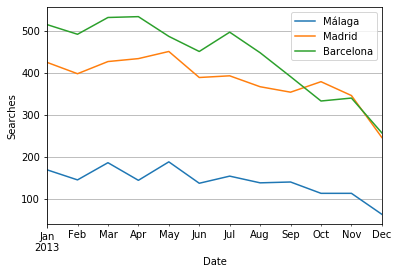

In [73]:
Destinations.plot()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Searches');

# Exercise 4: Match searches with bookings

For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 

For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 

Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.


In [1]:
import pandas as pd

In [2]:
searches_chunk=pd.read_csv('searches.csv.bz2',usecols=['Date','Time','Origin','Destination','Seg1Date'],sep='^',iterator=True,chunksize=10000)

searches_iter=pd.concat(searches_chunk,ignore_index=True)

searches_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390198 entries, 0 to 20390197
Data columns (total 5 columns):
Date           object
Time           object
Origin         object
Destination    object
Seg1Date       object
dtypes: object(5)
memory usage: 777.8+ MB


In [3]:
searches=searches_iter.drop_duplicates()
searches=searches.dropna()
searches.head()

,Date,Time,Origin,Destination,Seg1Date
0,2013-01-01,20:25:57,TXL,AUH,2013-01-26
1,2013-01-01,10:15:33,ATH,MIL,2013-01-04
2,2013-01-01,18:04:49,ICT,SFO,2013-08-02
3,2013-01-01,17:42:40,RNB,ARN,2013-01-02
4,2013-01-01,17:48:29,OSL,MAD,2013-03-22


In [4]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357972 entries, 0 to 358999
Data columns (total 5 columns):
Date           357972 non-null object
Time           357972 non-null object
Origin         357972 non-null object
Destination    357972 non-null object
Seg1Date       357972 non-null object
dtypes: object(5)
memory usage: 16.4+ MB


In [211]:
bookings_chunk=pd.read_csv('bookings.csv.bz2',usecols=[9,12,32,33],sep='^',chunksize=10000)

for dataframe in bookings_chunk:
    dataframe.dropna(inplace=True)
    dataframe.drop_duplicates(inplace=True)
    dataframe.columns=dataframe.columns.str.strip()
    dataframe['brd_time']=dataframe['brd_time'].str[:10]
    mix=searches.copy()
    mix=mix.merge(dataframe,left_on=['Origin','Destination'],right_on=['dep_port','arr_port'],how='outer')


In [212]:
searched=mix.copy()
searched.drop('off_time',axis=1,inplace=True)
searched

,Date,Time,Origin,Destination,Seg1Date,dep_port,arr_port,brd_time
0,2013-01-01,20:25:57,TXL,AUH,2013-01-26,NaN,NaN,NaN
1,2013-01-28,14:56:18,TXL,AUH,2013-02-23,NaN,NaN,NaN
2,2013-03-10,20:51:46,TXL,AUH,2013-12-27,NaN,NaN,NaN
3,2013-04-07,19:27:30,TXL,AUH,2013-07-06,NaN,NaN,NaN
4,2013-04-24,09:44:05,TXL,AUH,2013-12-27,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
357976,NaN,NaN,NaN,NaN,NaN,CMB,MAA,2013-05-24
357977,NaN,NaN,NaN,NaN,NaN,CMB,MAA,2013-05-19
357978,NaN,NaN,NaN,NaN,NaN,AUS,RDU,2013-07-12
357979,NaN,NaN,NaN,NaN,NaN,TLS,ORY,2013-06-04


# Exercise 5: Write a Web Service

Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output).

The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X 


We are following the post from [here](https://dzone.com/articles/restful-web-services-with-python-flask) and [here](https://flask.palletsprojects.com/en/1.0.x/quickstart/)

In [115]:
! pip install Flask

In [195]:
from flask import Flask

app = Flask(__name__)


@app.route("/")
def hello():
    return "Hello World!"


if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


In [196]:
! export FLASK_APP=hello.py

In [198]:
! export FLASK_DEBUG=1

In [199]:
! flask run

 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Usage: flask run [OPTIONS]

Error: Could not locate a Flask application. You did not provide the "FLASK_APP" environment variable, and a "wsgi.py" or "app.py" module was not found in the current directory.


http://127.0.0.1:5000/hello

Para nuestro Web Service usaremos el método GET:

In [200]:
from flask import Flask
app = Flask(__name__)
@app.route('/top_N/<int:X>',methods=['GET'])
def get_top_N(X):
    top = [ top_10.head(X)] 
    return jsonify(top)
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat
